In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import os

from astropy.io import fits
from time import sleep
from IPython import display



from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':"serif"})


In [27]:
file = "April_28_fits_Data/gj_3765_visitNumber_0_Apr27__movie.fits" #as an example
hdulist = fits.open(file)

In [33]:
hdulist.info()
hdulist[0].header

Filename: April_28_fits_Data/gj_3765_visitNumber_0_Apr27__movie.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      22   (16, 21, 6)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   16                                                  
NAXIS2  =                   21                                                  
NAXIS3  =                    6                                                  
EXTEND  =                    T                                                  
CDELT1  = -0.00041666666666666                                                  
CDELT2  = 0.000416666666666667                                                  
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRPIX1  =                  8.5                                                  
CRPIX2  =                 11

In [44]:
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
rad = 0.01 # deg

c_rad = rad / hdulist[0].header['CDELT2']
c_rad

23.99999999999998

In [31]:
cube = hdulist[0].data
cube.header

AttributeError: 'numpy.ndarray' object has no attribute 'header'

In [9]:
cube.shape

(6, 21, 16)

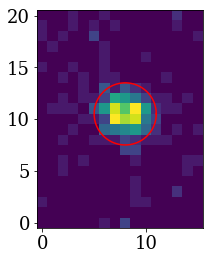

In [42]:
# print (len(cube))
for b in range(0,len(cube)):
    
    plt.imshow(cube[b,:,:], origin='lower')
    x = 3*np.cos(np.arange(0,2*np.pi,.001)) + 8
    y = 3*np.sin(np.arange(0,2*np.pi,.001)) + 10.5
    plt.plot(x,y,c='red')
    plt.show()
    display.clear_output(wait=True)
    sleep(1)



# plt.plot(cube[0,17,:])

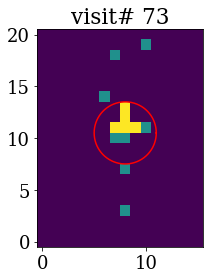

In [22]:
for k in range(0,74):
    w = str(k);
    file = "April_28_fits_Data/gj_3765_visitNumber_" + w + "_Apr27__movie.fits"
    hdulist = fits.open(file)
    cube = hdulist[0].data
    for b in range(0,len(cube)):
        plt.title("visit# " + w)
        plt.imshow(cube[b,:,:], origin='lower')
        x = 3*np.cos(np.arange(0,2*np.pi,.001)) + 8
        y = 3*np.sin(np.arange(0,2*np.pi,.001)) + 11
        plt.plot(x,y,c='red')
        plt.show()
        display.clear_output(wait=True)
        sleep(.1)
    

In [60]:



aVar = True
counter = 0
currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
        os.makedirs(currentDate)
        os.makedirs(currentDate + "/ds9_Images")
        os.makedirs(currentDate + "/data")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True